# CNN in small dataset with keras 
* Jikhan Jeong
* ref: https://www.manning.com/books/deep-learning-with-python
* CNN model requires Conv2, MaxPooling 2D layers in here
* 1. data augmentation
* 2. feature extraction with a pretraned network
* 3. fine tuning a pretrained network 
* an image classification or speech to text model trained on a large scale dataset and reuse it on a significantly idfferent probelm with only minor changes
* data source (cat and dog) : https://www.kaggle.com/c/dogs-vs-cats/data
* 143 page

# 1. Data Importing : dogs and cats

In [1]:
pwd

'C:\\Users\\정직한\\2019_Deep_Learning'

In [6]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8C77-271C

 C:\Users\정직한\2019_Deep_Learning 디렉터리

2019-07-02  오후 01:45            29,650 # July 1, 2019.ipynb
2019-07-23  오후 05:40            31,187 # July 23, 2019 3min ANN Regression.ipynb
2019-07-23  오후 05:56             5,882 # July 23, 2019 3min DNN for 2D image.ipynb
2019-07-23  오후 08:58            46,863 # July 23, 2019 3min DNN for Color Image CIFAR-10.ipynb
2019-07-29  오후 05:14            19,327 # July 29, 2019 3min CNN for Color Image.ipynb
2019-08-01  오후 12:41    <DIR>          .
2019-08-01  오후 12:41    <DIR>          ..
2019-08-01  오후 12:38    <DIR>          .ipynb_checkpoints
2019-06-30  오전 06:35           143,402 amazon.pkl
2019-08-01  오후 12:40             5,814 Aug 1, 2019 CNN small data set with keras.ipynb
2019-06-30  오전 06:30           143,402 azaon.pkl
2019-07-02  오후 01:35            13,180 distance.png
2019-06-23  오전 06:57           379,656 dog_cat_logit_model.krs
2019-08-01  오후 12:36    <DIR>          dogs_cats
2019-06-22  오전 08:5

In [21]:
import os, shutil

In [22]:
original_dataset_dir = 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats'

In [23]:
original_dataset_dir_train = 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats\\train'

In [24]:
original_dataset_dir_test = 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats\\test'

In [25]:
small_data_dir = 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small'

In [26]:
os.mkdir(small_data_dir) # create the folder

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small'

In [27]:
train_dir = os.path.join(small_data_dir,'train')

In [28]:
os.mkdir(train_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small\\train'

In [29]:
validation_dir = os.path.join(small_data_dir, 'validation')
os.mkdir(validation_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small\\validation'

In [30]:
test_dir = os.path.join(small_data_dir, 'test')
os.mkdir(test_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small\\test'

In [31]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small\\train\\cats'

In [32]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small\\train\\dogs'

In [33]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small\\validation\\cats'

In [34]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small\\validation\\dogs'

In [35]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small\\test\\cats'

In [36]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:\\Users\\정직한\\2019_Deep_Learning\\dogs_cats_small\\test\\dogs'

* Copies the first 1,000 cat images to train_cat_dir
* - shutil.copy(files path,destination path)

In [36]:
fnames =['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train,fname) # file from
    dst = os.path.join(train_cats_dir, fname)            # file to
    shutil.copyfile(src, dst)

* Copies the next 500 cat images to validation_cats_dir

In [37]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

* Copies the next 500 cat images to test_cats_dir

In [39]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

* Copies the first 1,000 dog images to train_dogs_dir
* - shutil.copy(files path,destination path)

In [47]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

* Copies the next 500 dog images to validation_dogs_dir

In [41]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

* Copies the next 500 dog images to test_dogs_dir

In [43]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [37]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# 2. Model
* 1. set Sequential
* 2. input, Conv2D, MaxPooling
* 3. Flatten to 1D
* 4. Output layer with sigmoid activation function to binary classification
* 5. Compile Model : loss='binary_crossentropy',optimizer=RMSprop

In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
model = models.Sequential()

In [3]:
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))) # input height, weight, color chanel =3

In [4]:
model.add(layers.MaxPooling2D((2, 2)))

In [5]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.add(layers.MaxPooling2D((2, 2)))

In [7]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [8]:
model.add(layers.MaxPooling2D((2, 2)))

In [9]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [10]:
model.add(layers.MaxPooling2D((2, 2)))

In [11]:
model.add(layers.Flatten())

In [12]:
model.add(layers.Dense(512, activation='relu'))

In [13]:
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
from keras import optimizers

In [16]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

# 3. Data Preprocessing
* 1. Read the picture files.
* 2. Decode the JPEG content to RGB grids of pixels.
* 3. Convert these into floating-point tensors.
* 4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval 
* 5.  All the process can automatically be done with package as follow code
*    - "from keras.preprocessing.image import ImageDataGenerator"

In [18]:
from keras.preprocessing.image import ImageDataGenerator

* trian generator from train_dir directory  : 2000 images with 2 classes = dog or cat

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
# Target directory is train_dir
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [40]:
test_datagen = ImageDataGenerator(rescale=1./255)

* validation generator from validation_dir directory : 1000 images with 2 classes = dog or cat

In [41]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [42]:
# batch size = 20 and binary classification

for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20,)


# 4. Fitting the model with Batch Generator
* need to steps per epoch, sample size = batch size x steps per epoch
* generator generates the sample endless so that it need to set the maximum number of steps
* train, validation and all data sets requires this process

In [44]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 181s 2s/step - loss: 0.6900 - acc: 0.5405 - val_loss: 0.6649 - val_acc: 0.5970
Epoch 2/30
100/100 [==============================] - 195s 2s/step - loss: 0.6586 - acc: 0.6100 - val_loss: 0.6625 - val_acc: 0.5830
Epoch 3/30
100/100 [==============================] - 190s 2s/step - loss: 0.6216 - acc: 0.6625 - val_loss: 0.6109 - val_acc: 0.6760
Epoch 4/30
100/100 [==============================] - 197s 2s/step - loss: 0.5799 - acc: 0.7060 - val_loss: 0.5778 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 213s 2s/step - loss: 0.5355 - acc: 0.7275 - val_loss: 0.5649 - val_acc: 0.7150
Epoch 6/30
100/100 [==============================] - 216s 2s/step - loss: 0.5021 - acc: 0.7505 - val_loss: 0.5584 - val_acc: 0.7140
Epoch 7/30
100/100 [==============================] - 212s 2s/step - loss: 0.4774 - acc: 0.7710 - val_loss: 0.5547 - val_acc: 0.7160
Epoch 8/30
100/100 [==============================] - 180s 2s/step - 

In [46]:
model.save('cats_and_dogs_small_1.h5')

# Graph

In [47]:
import matplotlib.pyplot as plt

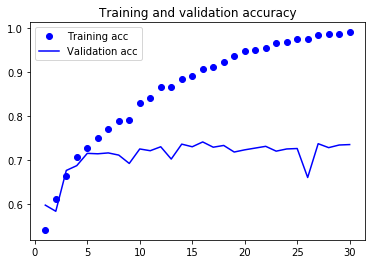

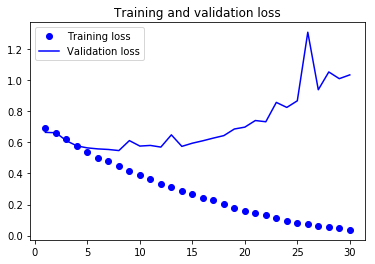

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# (Appendix) Generators in python
* reference: https://dojang.io/mod/page/view.php?id=2412
* 함수 안에서 yield를 사용하면 함수는 제너레이터가 되며 yield에는 값(변수)을 지정

In [88]:
def number_generator():
    yield 0
    yield 1
    yield 2
 
for i in number_generator():
    print(i)

0
1
2


In [86]:
def generator():
    i=0
    while True:
        i += 1
        yield i

In [87]:
for item in generator():
    print(item)
    if item > 4:
        break

1
2
3
4
5
